/tmp/ipython-input-1-879589273.py:8: RuntimeWarning: overflow encountered in exp
  def sigmoid(x): return 1 / (1 + np.exp(-x))


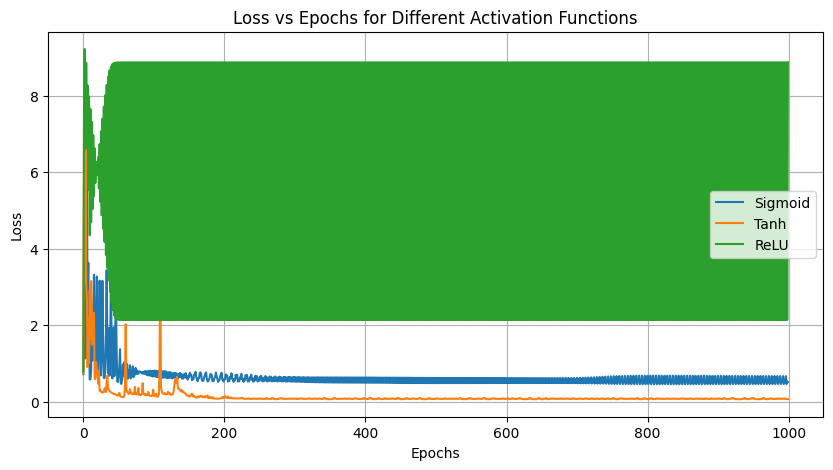

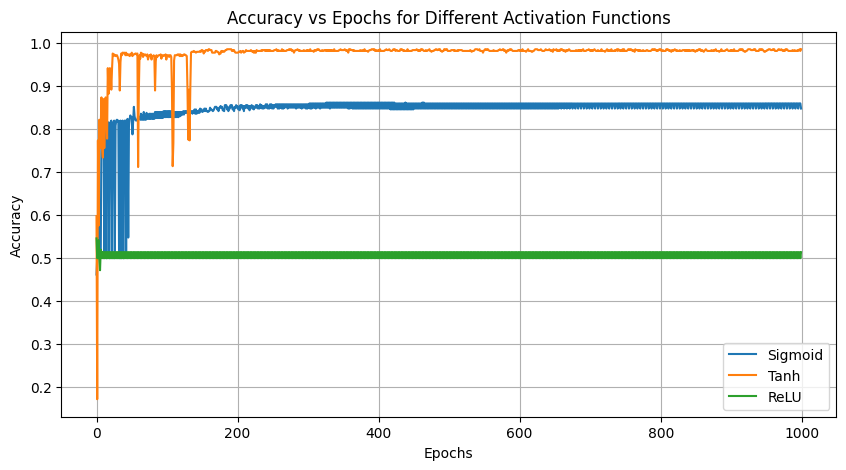

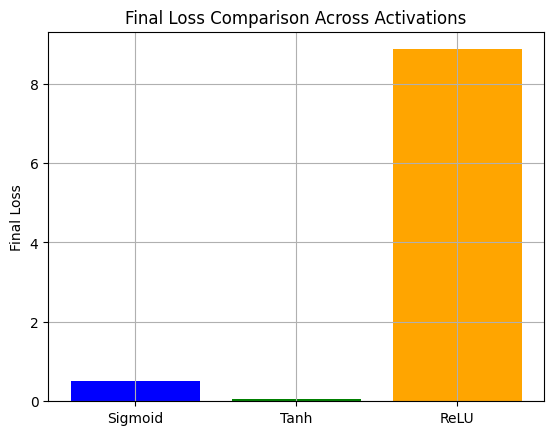

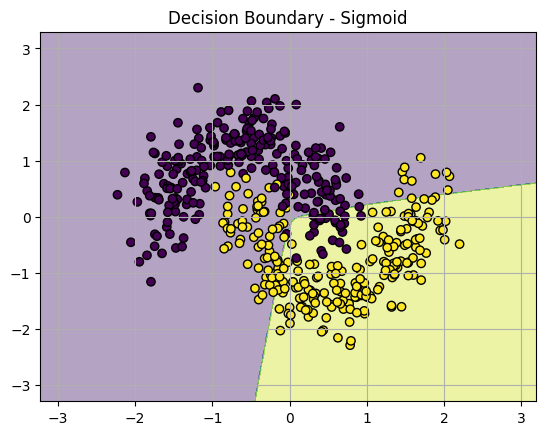

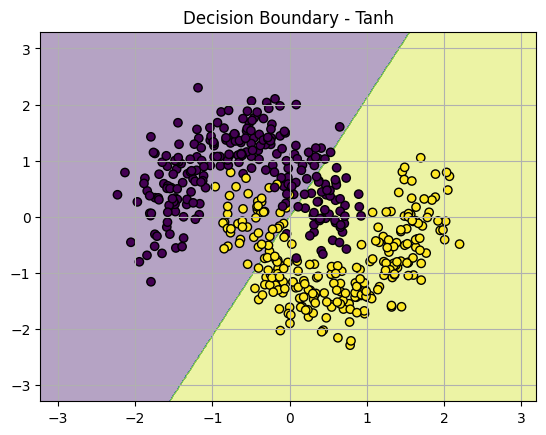

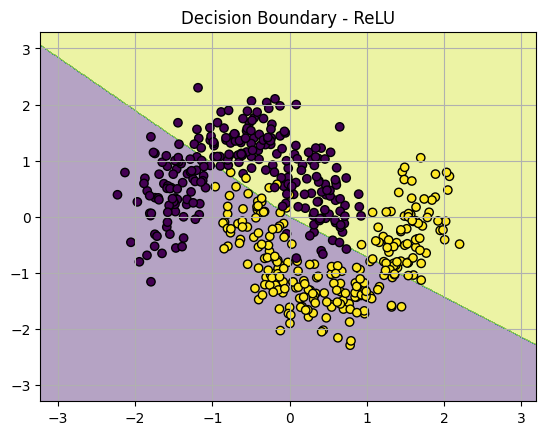

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Activation functions and their derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x) ** 2

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

# Training function for simple ANN
def train_ann(X, y, activation, activation_deriv, epochs=1000, lr=0.1, hidden_size=4):
    input_size = X.shape[1]
    output_size = 1

    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    loss_history = []
    acc_history = []

    for epoch in range(epochs):
        # Forward pass
        z1 = X @ W1 + b1
        a1 = activation(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)  # Output layer uses sigmoid

        # Loss
        loss = -np.mean(y * np.log(a2 + 1e-8) + (1 - y) * np.log(1 - a2 + 1e-8))
        loss_history.append(loss)

        # Accuracy
        predictions = (a2 > 0.5).astype(int)
        acc = np.mean(predictions == y)
        acc_history.append(acc)

        # Backpropagation
        dz2 = a2 - y
        dW2 = a1.T @ dz2
        db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = dz2 @ W2.T
        dz1 = da1 * activation_deriv(z1)
        dW1 = X.T @ dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    return loss_history, acc_history, W1, W2

# Plot decision boundary
def plot_decision_boundary(X, y, W1, W2, act_func, title="Decision Boundary"):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    z1 = grid @ W1 + 0
    a1 = act_func(z1)
    z2 = a1 @ W2 + 0
    a2 = sigmoid(z2)
    Z = (a2 > 0.5).astype(int).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k')
    plt.title(title)
    plt.grid(True)
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    plt.show()

# Load and preprocess dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)
X = StandardScaler().fit_transform(X)

# Config for activation functions
configs = {
    'Sigmoid': (sigmoid, sigmoid_deriv),
    'Tanh': (tanh, tanh_deriv),
    'ReLU': (relu, relu_deriv)
}



# Plot Loss vs Epochs
plt.figure(figsize=(10, 5))
for name, (act, d_act) in configs.items():
    losses, accs, _, _ = train_ann(X, y, act, d_act)
    plt.plot(losses, label=name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.savefig("loss_vs_epochs.png")
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(10, 5))
for name, (act, d_act) in configs.items():
    _, accs, _, _ = train_ann(X, y, act, d_act)
    plt.plot(accs, label=name)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.savefig("accuracy_vs_epochs.png")
plt.show()

# Plot Final Loss Comparison
final_losses = {}
for name, (act, d_act) in configs.items():
    losses, _, _, _ = train_ann(X, y, act, d_act)
    final_losses[name] = losses[-1]

plt.figure()
plt.bar(final_losses.keys(), final_losses.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Final Loss")
plt.title("Final Loss Comparison Across Activations")
plt.grid(True)
plt.savefig("final_loss_comparison.png")
plt.show()

# Plot decision boundaries
for name, (act, d_act) in configs.items():
    _, _, W1, W2 = train_ann(X, y, act, d_act)
    plot_decision_boundary(X, y, W1, W2, act, f"Decision Boundary - {name}")


/tmp/ipython-input-1-879589273.py:8: RuntimeWarning: overflow encountered in exp
  def sigmoid(x): return 1 / (1 + np.exp(-x))



--- Final Accuracy Comparison ---
Sigmoid: 0.8480
Tanh: 0.9860
ReLU: 0.5140


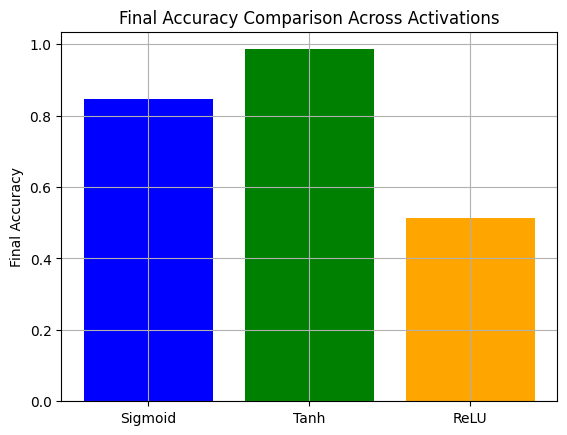

In [2]:
# prompt: print the accuracy of different activation from the above

import matplotlib.pyplot as plt
# Print final accuracy comparison
final_accuracies = {}
for name, (act, d_act) in configs.items():
    _, accs, _, _ = train_ann(X, y, act, d_act)
    final_accuracies[name] = accs[-1]

print("\n--- Final Accuracy Comparison ---")
for name, accuracy in final_accuracies.items():
    print(f"{name}: {accuracy:.4f}")

# Plot Final Accuracy Comparison
plt.figure()
plt.bar(final_accuracies.keys(), final_accuracies.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Final Accuracy")
plt.title("Final Accuracy Comparison Across Activations")
plt.grid(True)
plt.savefig("final_accuracy_comparison.png")
plt.show()